# Необходимые библиотеки



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
import pandas as pd

# Задача 7.1.4

In [3]:
# Шаг 1: Введём диф. уравнение с начальным условием (задача Коши)
def f(t, y):
    return -y * t * math.tan(t) + math.cos(t)**2

t0 = math.pi / 4
y0 = 0.5
T = t0 + 1
h = 0.1

# Вывод начальных данных для проверки
print(f"Начальное значение t0: {t0:.4f}")
print(f"Начальное значение y0: {y0:.4f}")
print(f"Конечное значение T: {T:.4f}")


Начальное значение t0: 0.7854
Начальное значение y0: 0.5000
Конечное значение T: 1.7854


In [4]:
# Шаг 2: Реализуем метод Эйлера
def euler(f, t0, y0, T, h):
    """
    Реализует метод Эйлера для численного решения задачи Коши для ОДУ первого порядка.

    Параметры:
    f : function
        Функция правой части ОДУ, f(t, y), которая принимает два аргумента: текущее время t и текущее значение функции y.
    t0 : float
        Начальное значение времени.
    y0 : float
        Начальное значение функции.
    T : float
        Конечное значение времени, до которого следует проводить интегрирование.
    h : float
        Шаг интегрирования.

    Возвращает:
    tuple
        Два numpy массива: массив значений времени и массив значений функции y в соответствующих временных точках.
    """
    n_steps = int((T - t0) / h)
    t_values = np.zeros(n_steps + 1)
    y_values = np.zeros(n_steps + 1)

    t_values[0] = t0
    y_values[0] = y0

    for i in range(n_steps):
        t = t_values[i]
        y = y_values[i]

        y_values[i + 1] = y + h * f(t, y)
        t_values[i + 1] = t + h

    return t_values, y_values

# Вычисление приближенного решения задачи Коши
t_values, y_values = euler(f, t0, y0, T, h)

# Вывод результатов
for t, y in zip(t_values, y_values):
    print(f"t = {t:.4f}, y = {y:.4f}")

t = 0.7854, y = 0.5000
t = 0.8854, y = 0.5107
t = 0.9854, y = 0.4955
t = 1.0854, y = 0.4524
t = 1.1854, y = 0.3811
t = 1.2854, y = 0.2838
t = 1.3854, y = 0.1674
t = 1.4854, y = 0.0471
t = 1.5854, y = -0.0339
t = 1.6854, y = -0.4023
t = 1.7854, y = -0.9901


In [5]:
# Шаг 3: реализовать метод Рунге-Кутты 4-ого порядка
def rkfixed(f, t0, y0, T, h):
    """
    Реализует метод Рунге-Кутты 4-го порядка для численного решения задачи Коши для ОДУ первого порядка.

    Параметры:
    f : function
        Функция правой части ОДУ, f(t, y), которая принимает два аргумента: текущее время t и текущее значение функции y.
    t0 : float
        Начальное значение времени.
    y0 : float
        Начальное значение функции.
    T : float
        Конечное значение времени, до которого следует проводить интегрирование.
    h : float
        Шаг интегрирования.

    Возвращает:
    tuple
        Два numpy массива: массив значений времени и массив значений функции y в соответствующих временных точках.
    """
    n_steps = int((T - t0) / h)
    t_values = np.zeros(n_steps + 1)
    y_values = np.zeros(n_steps + 1)

    t_values[0] = t0
    y_values[0] = y0

    for i in range(n_steps):
        t = t_values[i]
        y = y_values[i]

        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)

        y_values[i + 1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t_values[i + 1] = t + h

    return t_values, y_values

# Вычисление приближенного решения задачи Коши методом Рунге-Кутты 4-го порядка
t_values, y_values = rkfixed(f, t0, y0, T, h)

# Вывод результатов
for t, y in zip(t_values, y_values):
    print(f"t = {t:.4f}, y = {y:.4f}")

t = 0.7854, y = 0.5000
t = 0.8854, y = 0.4985
t = 0.9854, y = 0.4718
t = 1.0854, y = 0.4196
t = 1.1854, y = 0.3437
t = 1.2854, y = 0.2492
t = 1.3854, y = 0.1453
t = 1.4854, y = 0.0495
t = 1.5854, y = -0.2058
t = 1.6854, y = -4.4835
t = 1.7854, y = -13.0823


In [6]:
# Шаг 4:
# Определение аналитического решения
def exact_solution(t):
    return 0.5 - np.log(np.abs(np.cos(t)))

t        | y (Euler) | y (RK4)   | y (Exact)
---------|-----------|-----------|-----------
0.7854 | 0.5000   | 0.5000   | 0.8466
0.8854 | 0.5107   | 0.4985   | 0.9573
0.9854 | 0.4955   | 0.4718   | 1.0932
1.0854 | 0.4524   | 0.4196   | 1.2624
1.1854 | 0.3811   | 0.3437   | 1.4784
1.2854 | 0.2838   | 0.2492   | 1.7675
1.3854 | 0.1674   | 0.1453   | 2.1910
1.4854 | 0.0471   | 0.0495   | 2.9616
1.5854 | -0.0339   | -0.2058   | 4.7266
1.6854 | -0.4023   | -4.4835   | 2.6685
1.7854 | -0.9901   | -13.0823   | 2.0467


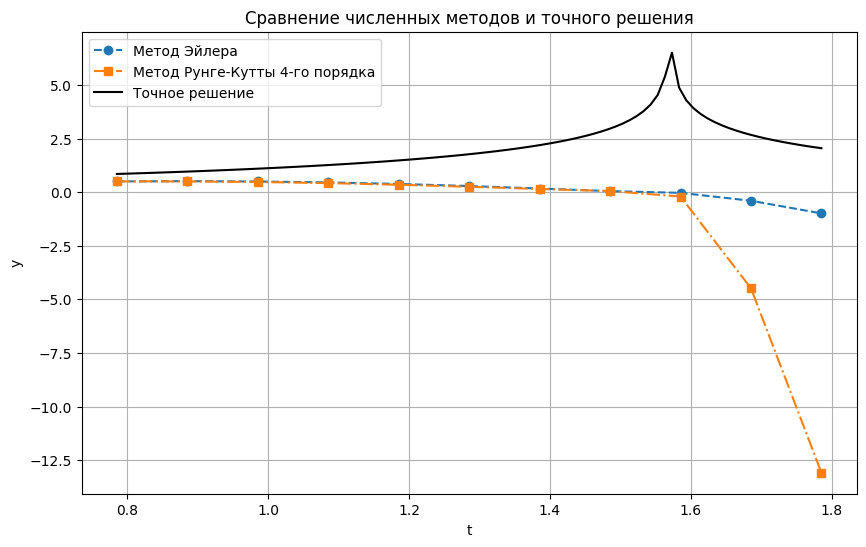

In [7]:
# Шаг 5:
# Вычисление численных решений
t_euler, y_euler = euler(f, t0, y0, T, h)
t_rk, y_rk = rkfixed(f, t0, y0, T, h)

# Вычисление точного решения
t_exact = np.linspace(t0, T, 100)
y_exact = exact_solution(t_exact)

# Построение таблицы значений
print("t        | y (Euler) | y (RK4)   | y (Exact)")
print("---------|-----------|-----------|-----------")
for t, y_e, y_r in zip(t_euler, y_euler, y_rk):
    y_ex = exact_solution(t)
    print(f"{t:.4f} | {y_e:.4f}   | {y_r:.4f}   | {y_ex:.4f}")

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, label='Метод Эйлера', marker='o', linestyle='--')
plt.plot(t_rk, y_rk, label='Метод Рунге-Кутты 4-го порядка', marker='s', linestyle='-.')
plt.plot(t_exact, y_exact, label='Точное решение', color='black', linestyle='-')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Сравнение численных методов и точного решения')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:** С t = 1.5854 точное решение резко увеличивается, а метод Эйлера и Рунге-Кутты показывают сильное расхождение с аналитическим решением, причём 2-ым методом быстро растёт отклонение.

Максимальная погрешность метода Эйлера: 4.7606
Максимальная погрешность метода Рунге-Кутты 4-го порядка: 15.1290


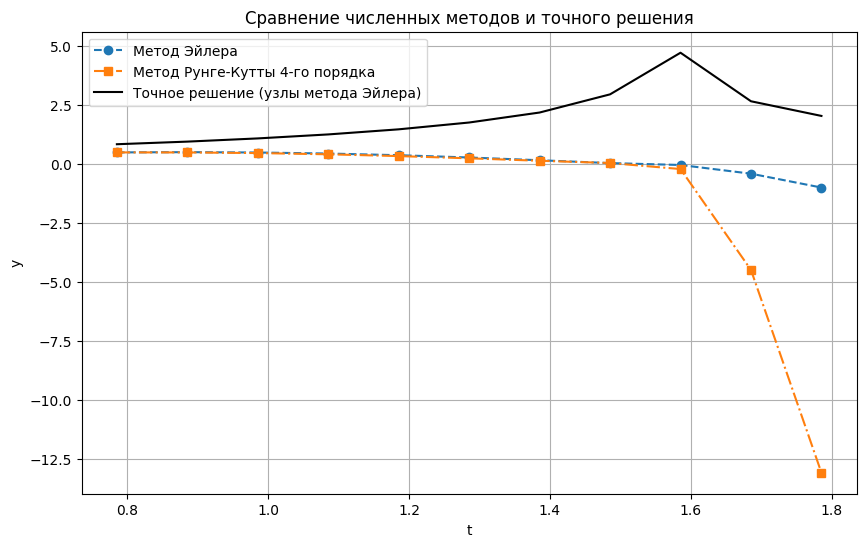

In [8]:
# Шаг 6:
# Пункт а)
# Вычисление точного решения в узлах численных методов
y_exact_at_euler_nodes = exact_solution(t_euler)
y_exact_at_rk_nodes = exact_solution(t_rk)

# Оценка погрешности
error_euler = np.max(np.abs(y_exact_at_euler_nodes - y_euler))
error_rk = np.max(np.abs(y_exact_at_rk_nodes - y_rk))

print(f"Максимальная погрешность метода Эйлера: {error_euler:.4f}")
print(f"Максимальная погрешность метода Рунге-Кутты 4-го порядка: {error_rk:.4f}")

# Построение графиков для визуального сравнения
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, label='Метод Эйлера', marker='o', linestyle='--')
plt.plot(t_rk, y_rk, label='Метод Рунге-Кутты 4-го порядка', marker='s', linestyle='-.')
plt.plot(t_euler, y_exact_at_euler_nodes, label='Точное решение (узлы метода Эйлера)', color='black', linestyle='-')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Сравнение численных методов и точного решения')
plt.legend()
plt.grid(True)
plt.show()

Погрешность по правилу Рунге (метод Эйлера): 0.6945
Погрешность по правилу Рунге (метод Рунге-Кутты 4-го порядка): 0.1602


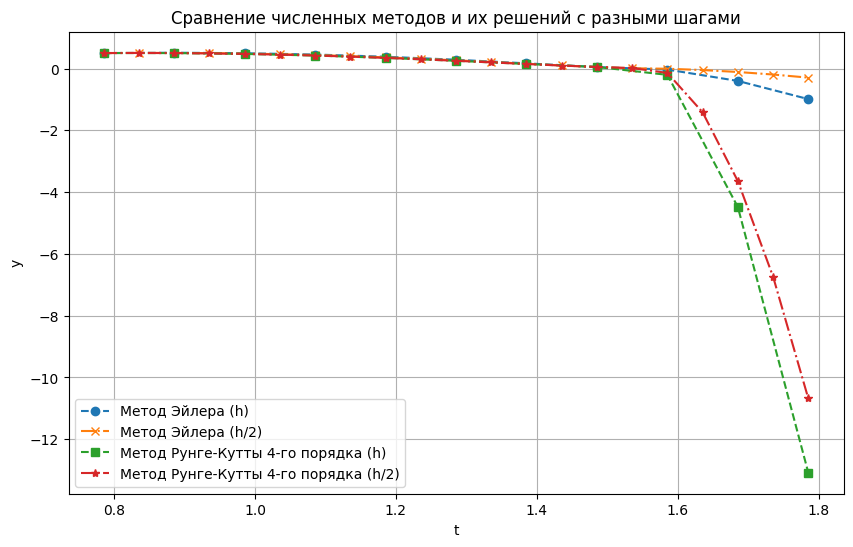

In [10]:
# Пункт b)

'''
Правило Рунге для оценки погрешности (правило двойного пересчета)
Сравнение решений при шаг h и h/2 для оценки погрешности
'''

# Решение с шагом h
t_euler, y_euler = euler(f, t0, y0, T, h)
t_rk, y_rk = rkfixed(f, t0, y0, T, h)

# Решение с шагом h/2
t_euler_half, y_euler_half = euler(f, t0, y0, T, h / 2)
t_rk_half, y_rk_half = rkfixed(f, t0, y0, T, h / 2)

# Уменьшение размеров массивов для интерполяции
t_euler_half_interp = t_euler_half[::2]
y_euler_half_interp = y_euler_half[::2]
t_rk_half_interp = t_rk_half[::2]
y_rk_half_interp = y_rk_half[::2]

# Оценка погрешности по правилу Рунге
# Для метода Эйлера (порядок 1)
error_euler_runge = np.max(np.abs(y_euler - y_euler_half_interp) / (2 - 1))

# Для метода Рунге-Кутты 4-го порядка (порядок 4)
error_rk_runge = np.max(np.abs(y_rk - y_rk_half_interp) / (2**4 - 1))

print(f"Погрешность по правилу Рунге (метод Эйлера): {error_euler_runge:.4f}")
print(f"Погрешность по правилу Рунге (метод Рунге-Кутты 4-го порядка): {error_rk_runge:.4f}")

# Построение графиков для визуального сравнения
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, label='Метод Эйлера (h)', marker='o', linestyle='--')
plt.plot(t_euler_half, y_euler_half, label='Метод Эйлера (h/2)', marker='x', linestyle='-.')
plt.plot(t_rk, y_rk, label='Метод Рунге-Кутты 4-го порядка (h)', marker='s', linestyle='--')
plt.plot(t_rk_half, y_rk_half, label='Метод Рунге-Кутты 4-го порядка (h/2)', marker='*', linestyle='-.')

plt.xlabel('t')
plt.ylabel('y')
plt.title('Сравнение численных методов и их решений с разными шагами')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:** При шаге h/2 оба метода имеют меньше отклонения от исходного решения, но при этом для метода Рунге-Кутты уменьшение шага - значительней уменьшило отклонение

In [14]:
# Решение с шагом 0.1 (метод Рунге-Кутты)
t_rk, y_rk = rkfixed(f, t0, y0, T, h)
y_exact = exact_solution(t_rk)
error_rk = np.max(np.abs(y_rk - y_exact))

# Функция для нахождения погрешности методом Эйлера с заданным шагом
def euler_error(f, t0, y0, T, h):
    t_values, y_values = euler(f, t0, y0, T, h)
    y_exact = exact_solution(t_values)
    error = np.max(np.abs(y_values - y_exact))
    return error

# Поиск шага h* для метода Эйлера
target_error = error_rk
h_euler = h
current_error = euler_error(f, t0, y0, T, h_euler)

# Дробим шаг пополам, пока не найдем требуемую точность
while current_error > target_error:
    h_euler /= 2
    current_error = euler_error(f, t0, y0, T, h_euler)
    print(f"Шаг h = {h_euler:.6f}, Погрешность = {current_error:.6f}")

print(f"Найденное значение h* для метода Эйлера: {h_euler:.6f}")

Найденное значение h* для метода Эйлера: 0.100000


# Задача 7.2.2

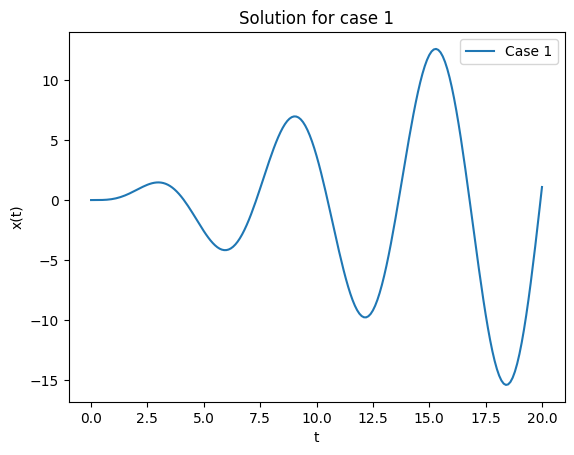

Case 1:
Max x(t): 12.572009394864757 at t = 15.3
Min x(t): -15.377634078809878 at t = 18.400000000000002


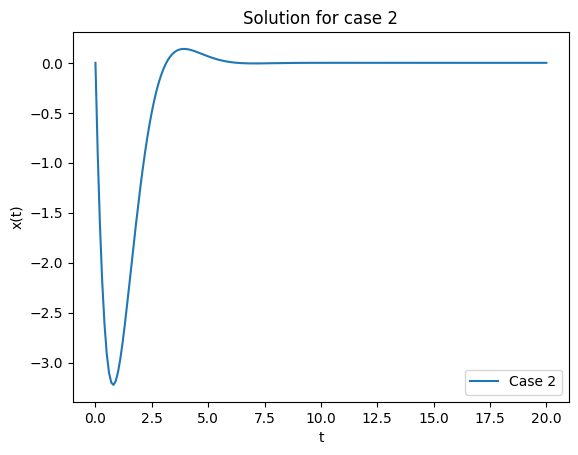

Case 2:
Max x(t): 0.13921746299583057 at t = 3.9000000000000004
Min x(t): -3.2232899607619863 at t = 0.8


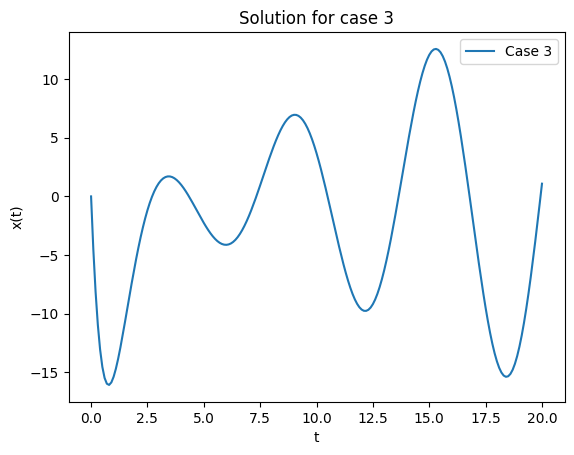

Case 3:
Max x(t): 12.572004900286892 at t = 15.3
Min x(t): -16.069444784739478 at t = 0.8


In [16]:
def rkfixed(f, t0, y0, T, h):
    """
    Реализует метод Рунге-Кутты 4-го порядка для численного решения задачи Коши для системы ОДУ первого порядка.

    Параметры:
    ----------
    f : function
        Функция правой части системы ОДУ, которая принимает два аргумента: текущее время t и текущее значение вектора состояний y.
        Возвращает массив производных.
    t0 : float
        Начальное значение времени.
    y0 : array_like
        Начальное значение вектора состояний. Массив из начальных значений для каждой переменной.
    T : float
        Конечное значение времени, до которого проводится интегрирование.
    h : float
        Шаг интегрирования.

    Возвращает:
    ----------
    tuple
        Два numpy массива:
        - t_values: массив значений времени.
        - y_values: массив значений вектора состояний в соответствующих временных точках.
    """
    n_steps = int((T - t0) / h)
    t_values = np.linspace(t0, T, n_steps + 1)
    y_values = np.zeros((n_steps + 1, len(y0)))

    t_values[0] = t0
    y_values[0] = y0

    for i in range(n_steps):
        t = t_values[i]
        y = y_values[i]

        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)

        y_values[i + 1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t_values, y_values

# Функция для системы ОДУ
def system(t, y, H, k, m, f):
    x1, x2 = y
    dx1dt = x2
    dx2dt = (f(t) - H * x2 - k * x1) / m
    return np.array([dx1dt, dx2dt])

# Функция внешней силы
def f1(t):
    return t * np.sin(t)

# Решение задачи для заданных параметров
def solve_system(H, k, m, f, x0, v0, T):
    t0 = 0
    h = 0.1
    y0 = [x0, v0]
    t_values, y_values = rkfixed(lambda t, y: system(t, y, H, k, m, f), t0, y0, T, h)
    x_values = y_values[:, 0]
    return t_values, x_values

# Задание параметров
parameters = [
    {'H': 1, 'k': 1, 'm': 0.5, 'f': f1, 'x0': 0, 'v0': 0, 'T': 20},
    {'H': 1, 'k': 1, 'm': 0.5, 'f': lambda t: 0, 'x0': 0, 'v0': -10, 'T': 20},
    {'H': 1, 'k': 1, 'm': 0.5, 'f': f1, 'x0': 0, 'v0': -50, 'T': 20}
]

# Решение задачи и построение графиков
for i, params in enumerate(parameters):
    t_values, x_values = solve_system(**params)
    plt.plot(t_values, x_values, label=f'Case {i+1}')
    plt.title(f'Solution for case {i+1}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()
    plt.show()

    # Определение максимума и минимума
    max_x = np.max(x_values)
    min_x = np.min(x_values)
    max_t = t_values[np.argmax(x_values)]
    min_t = t_values[np.argmin(x_values)]

    print(f"Case {i+1}:")
    print(f"Max x(t): {max_x} at t = {max_t}")
    print(f"Min x(t): {min_x} at t = {min_t}")

**Вывод:** Из графиков видно, что первый набор параметров соответствует колебаниям с увеличением амплитуды. Второй - Затухающие колебания без внешней силы с отрицательной скоростью, а третий - колебания с большой амплитудой

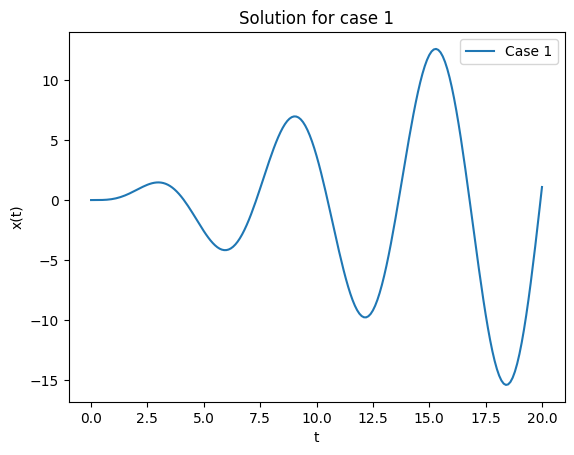

Case 1:
Max x(t): 12.572009394864757 at t = 15.3
Min x(t): -15.377634078809878 at t = 18.400000000000002


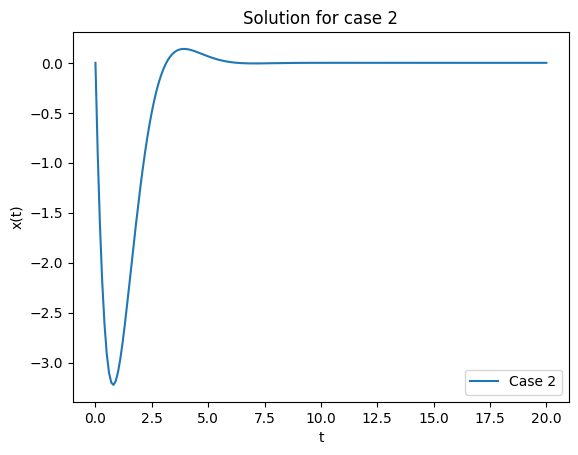

Case 2:
Max x(t): 0.13921746299583057 at t = 3.9000000000000004
Min x(t): -3.2232899607619863 at t = 0.8


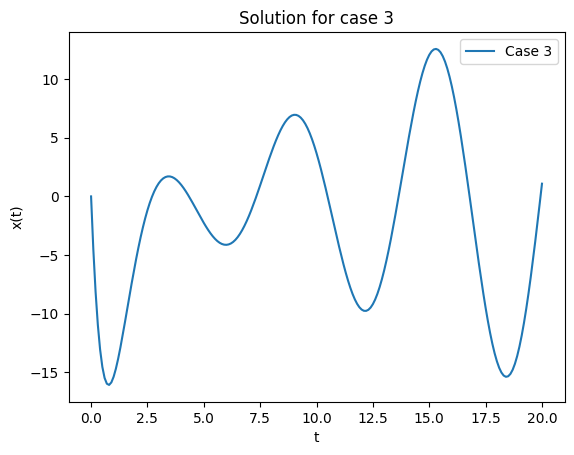

Case 3:
Max x(t): 12.572004900286892 at t = 15.3
Min x(t): -16.069444784739478 at t = 0.8

Интерпретация:
В случае первого варианта параметров (Case 1), график показывает колебания груза с постепенным уменьшением амплитуды. Это происходит из-за наличия внешней силы, которая воздействует на систему.
В случае второго варианта параметров (Case 2), груз движется с постоянной скоростью в отсутствие внешних сил.
В случае третьего варианта параметров (Case 3), график показывает быстрые и чрезмерные колебания груза из-за большой начальной скорости груза и воздействия внешней силы.


In [17]:
# Решение задачи и построение графиков
for i, params in enumerate(parameters):
    t_values, x_values = solve_system(**params)
    plt.plot(t_values, x_values, label=f'Case {i+1}')
    plt.title(f'Solution for case {i+1}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()
    plt.show()

    # Определение максимума и минимума
    max_x = np.max(x_values)
    min_x = np.min(x_values)
    max_t = t_values[np.argmax(x_values)]
    min_t = t_values[np.argmin(x_values)]

    print(f"Case {i+1}:")
    print(f"Max x(t): {max_x} at t = {max_t}")
    print(f"Min x(t): {min_x} at t = {min_t}")

# Добавим интерпретацию полученного движения
print("\nИнтерпретация:")
print("В случае первого варианта параметров (Case 1), график показывает колебания груза с постепенным уменьшением амплитуды. Это происходит из-за наличия внешней силы, которая воздействует на систему.")
print("В случае второго варианта параметров (Case 2), груз движется с постоянной скоростью в отсутствие внешних сил.")
print("В случае третьего варианта параметров (Case 3), график показывает быстрые и чрезмерные колебания груза из-за большой начальной скорости груза и воздействия внешней силы.")

In [18]:
# Определение требуемых характеристик для каждого варианта параметров
for i, params in enumerate(parameters):
    t_values, x_values = solve_system(**params)
    max_x = np.max(x_values)
    min_x = np.min(x_values)
    max_t = t_values[np.argmax(x_values)]
    min_t = t_values[np.argmin(x_values)]

    print(f"Характеристики для варианта параметров {i+1}:")
    print(f"Максимальное значение x(t): {max_x} достигается в момент времени t = {max_t}")
    print(f"Минимальное значение x(t): {min_x} достигается в момент времени t = {min_t}")


Характеристики для варианта параметров 1:
Максимальное значение x(t): 12.572009394864757 достигается в момент времени t = 15.3
Минимальное значение x(t): -15.377634078809878 достигается в момент времени t = 18.400000000000002
Характеристики для варианта параметров 2:
Максимальное значение x(t): 0.13921746299583057 достигается в момент времени t = 3.9000000000000004
Минимальное значение x(t): -3.2232899607619863 достигается в момент времени t = 0.8
Характеристики для варианта параметров 3:
Максимальное значение x(t): 12.572004900286892 достигается в момент времени t = 15.3
Минимальное значение x(t): -16.069444784739478 достигается в момент времени t = 0.8


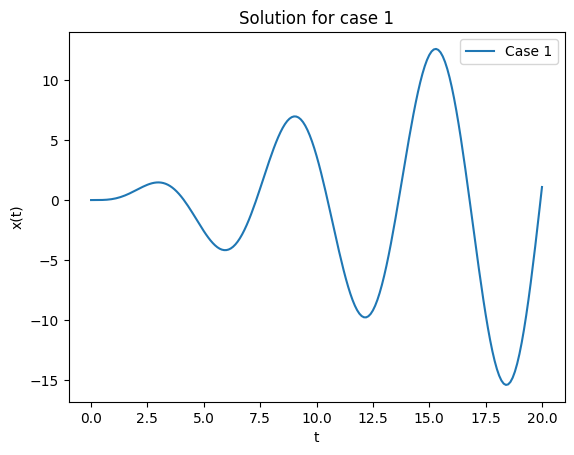

Case 1:
Max x(t): 12.572009394864757 at t = 15.3
Min x(t): -15.377634078809878 at t = 18.400000000000002


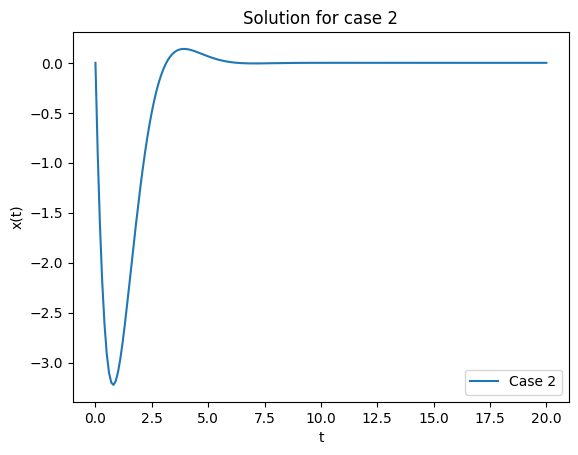

Case 2:
Max x(t): 0.13921746299583057 at t = 3.9000000000000004
Min x(t): -3.2232899607619863 at t = 0.8


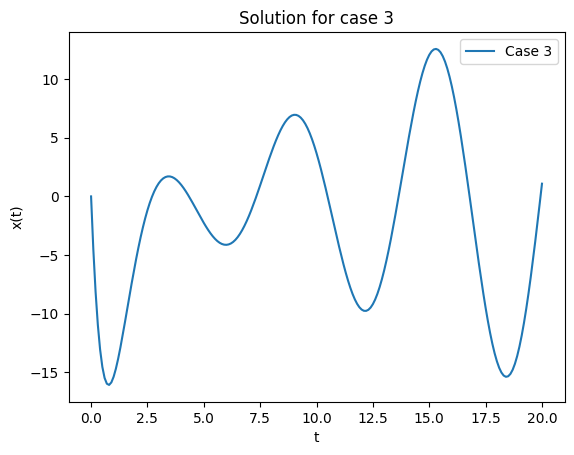

Case 3:
Max x(t): 12.572004900286892 at t = 15.3
Min x(t): -16.069444784739478 at t = 0.8


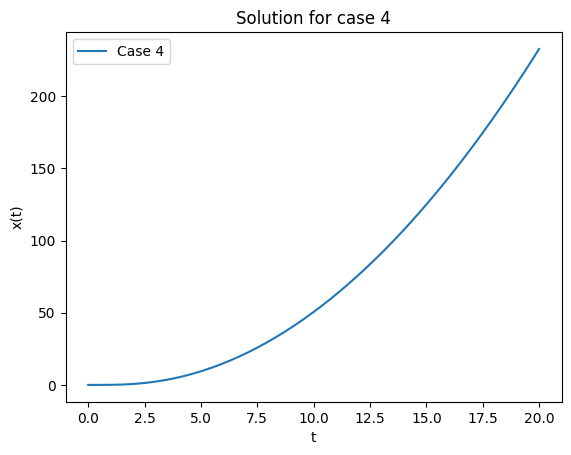

Case 4:
Max x(t): 232.77036743117685 at t = 20.0
Min x(t): 0.0 at t = 0.0

Интерпретация:
В случае первого варианта параметров (Case 1), график показывает колебания груза с постепенным уменьшением амплитуды. Это происходит из-за наличия внешней силы, которая воздействует на систему.
В случае второго варианта параметров (Case 2), груз движется с постоянной скоростью в отсутствие внешних сил.
В случае третьего варианта параметров (Case 3), график показывает быстрые и чрезмерные колебания груза из-за большой начальной скорости груза и воздействия внешней силы.
В случае четвертого варианта параметров (Case 4), график демонстрирует движение груза с увеличенной массой, упругостью и воздействием внешней силы, что может привести к изменению характера колебаний.


In [19]:
# С учётом собственного набора
parameters = [
    {'H': 1, 'k': 1, 'm': 0.5, 'f': f1, 'x0': 0, 'v0': 0, 'T': 20},
    {'H': 1, 'k': 1, 'm': 0.5, 'f': lambda t: 0, 'x0': 0, 'v0': -10, 'T': 20},
    {'H': 1, 'k': 1, 'm': 0.5, 'f': f1, 'x0': 0, 'v0': -50, 'T': 20},
    {'H': 2, 'k': 1.5, 'm': 0.8, 'f': lambda t: t**2, 'x0': 0, 'v0': 0, 'T': 20}
]

# Решение задачи и построение графиков
for i, params in enumerate(parameters):
    t_values, x_values = solve_system(**params)
    plt.plot(t_values, x_values, label=f'Case {i+1}')
    plt.title(f'Solution for case {i+1}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()
    plt.show()

    # Определение максимума и минимума
    max_x = np.max(x_values)
    min_x = np.min(x_values)
    max_t = t_values[np.argmax(x_values)]
    min_t = t_values[np.argmin(x_values)]

    print(f"Case {i+1}:")
    print(f"Max x(t): {max_x} at t = {max_t}")
    print(f"Min x(t): {min_x} at t = {min_t}")

print("\nИнтерпретация:")
print("В случае первого варианта параметров (Case 1), график показывает колебания груза с постепенным уменьшением амплитуды. Это происходит из-за наличия внешней силы, которая воздействует на систему.")
print("В случае второго варианта параметров (Case 2), груз движется с постоянной скоростью в отсутствие внешних сил.")
print("В случае третьего варианта параметров (Case 3), график показывает быстрые и чрезмерные колебания груза из-за большой начальной скорости груза и воздействия внешней силы.")
print("В случае четвертого варианта параметров (Case 4), график демонстрирует движение груза с увеличенной массой, упругостью и воздействием внешней силы, что может привести к изменению характера колебаний.")

In [20]:
# Решение задачи для четвертого варианта параметров
t_values, x_values = solve_system(H=2, k=1.5, m=0.8, f=lambda t: t**2, x0=0, v0=0, T=20)

# Определение максимума и минимума
max_x = np.max(x_values)
min_x = np.min(x_values)
max_t = t_values[np.argmax(x_values)]
min_t = t_values[np.argmin(x_values)]

print("Четвертый вариант параметров:")
print(f"Максимальное значение x(t): {max_x} достигается в момент времени t = {max_t}")
print(f"Минимальное значение x(t): {min_x} достигается в момент времени t = {min_t}")


Четвертый вариант параметров:
Максимальное значение x(t): 232.77036743117685 достигается в момент времени t = 20.0
Минимальное значение x(t): 0.0 достигается в момент времени t = 0.0


# Задача 7.6.2

In [ ]:
def euler_method(A, Y0, h, n):
    """
    Решение системы ОДУ первого порядка с постоянными коэффициентами методом явного Эйлера.

    Параметры:
    A (numpy.ndarray): Матрица коэффициентов системы.
    Y0 (numpy.ndarray): Вектор начальных условий.
    h (float): Шаг интегрирования.
    n (int): Количество шагов.

    Возвращает:
    numpy.ndarray: Массив значений решения на каждом шаге интегрирования.
    """
    Y = np.zeros((n+1, len(Y0)))
    Y[0] = Y0.T
    for i in range(n):
        Y[i+1] = Y[i] + h * np.dot(A, Y[i])
    return Y

# Данные задачи
A = np.array([[-13.237, 15.299], [33.885, 522.183]])
Y0 = np.array([[2], [0]])

B = np.array([[-6.905, 0.03], [-0.145, -6.095]])
Z0 = np.array([[1], [5]])

# Параметры
h = 0.01
n = int(1 / h)

# Решение задачи для системы с матрицей A
Y = euler_method(A, Y0, h, n)
print("Решение для системы с матрицей A на первом шаге:")
print(Y[1])

# Решение задачи для системы с матрицей B
Z = euler_method(B, Z0, h, n)
print("Решение для системы с матрицей B на первом шаге:")
print(Z[1])


Решение для системы с матрицей A на первом шаге:
[1.73526 0.6777 ]
Решение для системы с матрицей B на первом шаге:
[0.93245 4.6938 ]


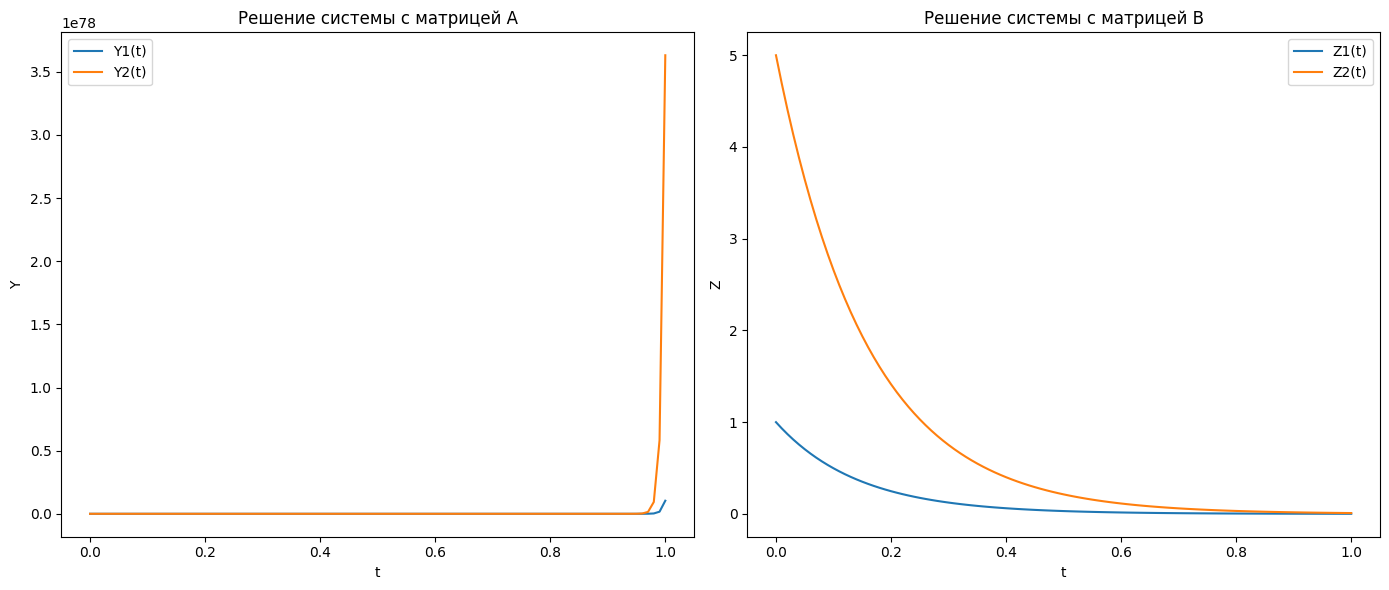

In [ ]:
# Решение задачи для системы с матрицей A
Y = euler_method(A, Y0, h, n)

# Решение задачи для системы с матрицей B
Z = euler_method(B, Z0, h, n)

# Построение графиков для наглядности
t = np.linspace(0, 1, n+1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, Y[:, 0], label='Y1(t)')
plt.plot(t, Y[:, 1], label='Y2(t)')
plt.title('Решение системы с матрицей A')
plt.xlabel('t')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, Z[:, 0], label='Z1(t)')
plt.plot(t, Z[:, 1], label='Z2(t)')
plt.title('Решение системы с матрицей B')
plt.xlabel('t')
plt.ylabel('Z')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Матрица A
A = np.array([[-13.237, 15.299], [33.885, 522.183]])

# Вычисление собственных значений матрицы A
eigenvalues_A = np.linalg.eigvals(A)

# Матрица B
B = np.array([[-6.905, 0.03], [-0.145, -6.095]])

# Вычисление собственных значений матрицы B
eigenvalues_B = np.linalg.eigvals(B)

print("Собственные значения матрицы A:", eigenvalues_A)
print("Собственные значения матрицы B:", eigenvalues_B)

Собственные значения матрицы A: [-14.20347965 523.14947965]
Собственные значения матрицы B: [-6.89959354 -6.10040646]


**Вывод:** Матрица А является неустойчивым для шага h = 0.01, так как спектральный радиус по модулю очень большой, из-за чего нужно брать шаг больше. Для матрицы B задача является устойчивым для метода Эйлера, так как абс. величина собственных значений довольно мала.

In [ ]:
# Шаг 2:

# Коэффициенты жесткости
kappa_A = np.max(np.abs(eigenvalues_A)) / np.min(np.abs(eigenvalues_A))
kappa_B = np.max(np.abs(eigenvalues_B)) / np.min(np.abs(eigenvalues_B))

print("Коэффициент жесткости для системы с матрицей A:", kappa_A)
print("Коэффициент жесткости для системы с матрицей B:", kappa_B)

Коэффициент жесткости для системы с матрицей A: 36.832487016036424
Коэффициент жесткости для системы с матрицей B: 1.1310055473648157


**Вывод:** Матрица А является более жёсткой, чем B, однако обе системы не являются жёсткими, так как коэффициенты жёсткости на проходят порог в 1000

In [ ]:
# Шаг 3:
'''
Для того, чтобы найти h* шаг для матрицы А, воспользуемся неравенствым
что h* < 2 / P(A), где Р(А) - спектральный радиус матрицы А
'''
# Спектральный радиус матрицы A
rho_A = 523.15

# Оценка шага h*
h_star = 2 / rho_A
print("Оценка шага h*:", h_star)

Оценка шага h*: 0.003822995316830737


In [ ]:
# Шаг 4:
def implicit_euler_method(A, Y0, h, n):
    """
    Решение системы ОДУ первого порядка с постоянными коэффициентами по неявному методу Эйлера.

    Параметры:
    A (numpy.ndarray): Матрица коэффициентов системы.
    Y0 (numpy.ndarray): Вектор начальных условий.
    h (float): Шаг интегрирования.
    n (int): Количество шагов.

    Возвращает:
    numpy.ndarray: Массив значений решения на каждом шаге интегрирования.
    """
    m = len(Y0)
    Y = np.zeros((n+1, m))
    Y[0] = Y0.T

    I = np.eye(m)  # Единичная матрица того же размера, что и A
    for i in range(n):
        Y[i+1] = np.linalg.solve(I - h * A, Y[i])

    return Y

# Пример использования функции

# Матрица A
A = np.array([[-13.237, 15.299], [33.885, 522.183]])
# Начальные условия Y0
Y0 = np.array([[2], [0]])
# Параметры
h = 0.01
n = int(1 / h)

# Решение задачи по неявному методу Эйлера
Y = implicit_euler_method(A, Y0, h, n)
print("Решение для системы с матрицей A по неявному методу Эйлера:")
print(Y)

Решение для системы с матрицей A по неявному методу Эйлера:
[[ 2.00000000e+00  0.00000000e+00]
 [ 1.74726022e+00 -1.40237557e-01]
 [ 1.53089885e+00 -8.96548456e-02]
 [ 1.34027766e+00 -8.63365508e-02]
 [ 1.17364021e+00 -7.37479796e-02]
 [ 1.02766217e+00 -6.50133584e-02]
 [ 8.99854838e-01 -5.68242809e-02]
 [ 7.87939251e-01 -4.97814773e-02]
 [ 6.89943461e-01 -4.35843850e-02]
 [ 6.04135196e-01 -3.81651621e-02]
 [ 5.28998949e-01 -3.34182408e-02]
 [ 4.63207380e-01 -2.92620925e-02]
 [ 4.05598308e-01 -2.56227499e-02]
 [ 3.55154071e-01 -2.24360543e-02]
 [ 3.10983582e-01 -1.96456826e-02]
 [ 2.72306573e-01 -1.72023506e-02]
 [ 2.38439822e-01 -1.50628952e-02]
 [ 2.08785076e-01 -1.31895239e-02]
 [ 1.82818489e-01 -1.15491436e-02]
 [ 1.60081365e-01 -1.01127774e-02]
 [ 1.40172056e-01 -8.85505187e-03]
 [ 1.22738866e-01 -7.75374962e-03]
 [ 1.07473841e-01 -6.78941627e-03]
 [ 9.41073258e-02 -5.94501699e-03]
 [ 8.24032035e-02 -5.20563560e-03]
 [ 7.21547222e-02 -4.55821102e-03]
 [ 6.31808439e-02 -3.99130660e

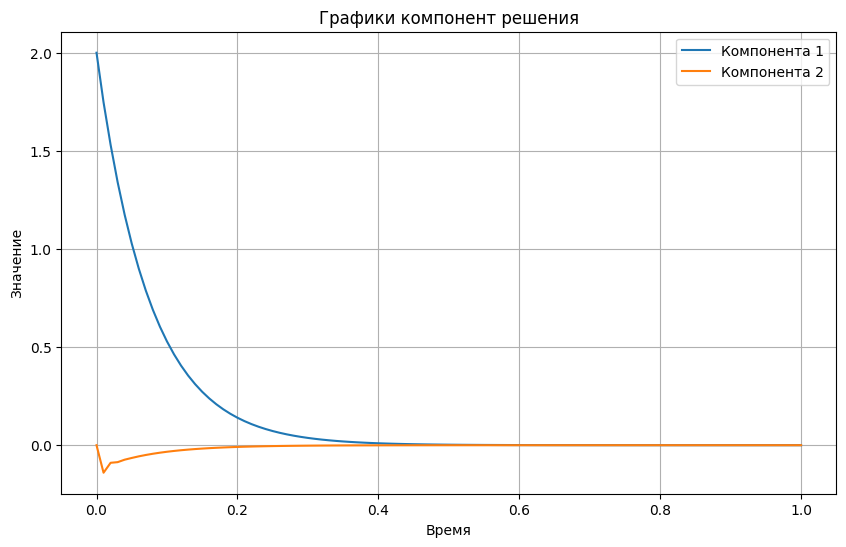

In [ ]:
# Визуализация результатов
t_values = np.linspace(0, 1, n+1)  # Временные шаги

plt.figure(figsize=(10, 6))
plt.plot(t_values, Y[:, 0], label='Компонента 1')
plt.plot(t_values, Y[:, 1], label='Компонента 2')
plt.title('Графики компонент решения')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()